<a href="https://colab.research.google.com/github/halaalduh/Diabetes-Prediction-using-Healthcare-Dataset/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# **Loading the Data**
The dataset is loaded successfully from the CSV file to prepare it for analysis.

In [ ]:
data = pd.read_csv("Preprocessed_dataset-2.csv")
print("Dataset loaded successfully!")
display(data.head())

Dataset loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Bin,Glucose_Bin
0,0.352941,0.680645,0.526316,0.271845,0.525,0.288945,0.491935,0.483333,1,2.0,2
1,0.058824,0.375806,0.467105,0.213592,0.525,0.201005,0.244624,0.166667,0,1.0,1
2,0.470588,0.590323,0.434211,0.213592,0.525,0.144054,0.532258,0.183333,1,1.0,2
3,0.058824,0.400000,0.394737,0.155340,0.000,0.097990,0.079749,0.000000,0,0.0,1
4,0.000000,0.567742,0.223684,0.271845,1.000,0.236181,1.000000,0.200000,1,1.0,2


# **Feature Selection**
Only Glucose and BMI were selected for clustering because they provide clear separation between individuals.

In [ ]:
# We will use 'Glucose' and 'BMI' because they are strong health indicators.
X = data[['Glucose', 'BMI']].values
print("Selected columns: Glucose and BMI")

Selected columns: Glucose and BMI


# **K-Means Clustering (K = 2, 3, 4)**
The K-Means algorithm was applied using three different K values to compare cluster quality and structure.


K-MEANS CLUSTERING - K = 2
Cluster Centers:
[[0.314509   0.2388948 ]
 [0.59664979 0.30033631]]

Cluster Labels:
[1 0 1 ... 0 1 0]


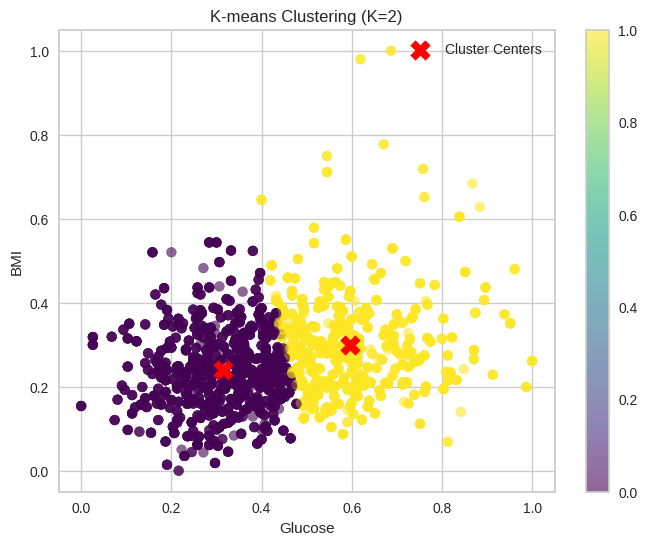


K-MEANS CLUSTERING - K = 3
Cluster Centers:
[[0.4357182  0.26464595]
 [0.6625855  0.32024676]
 [0.24526715 0.22058116]]

Cluster Labels:
[1 0 1 ... 2 1 2]


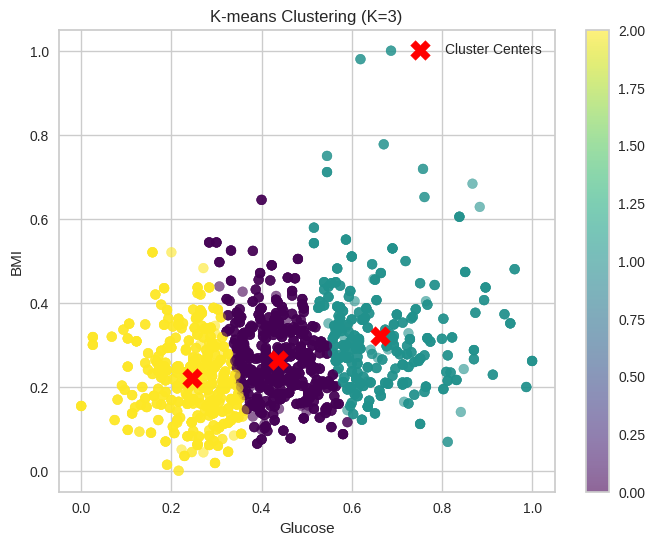


K-MEANS CLUSTERING - K = 4
Cluster Centers:
[[0.36360674 0.37064466]
 [0.46703331 0.21605891]
 [0.24621981 0.19369093]
 [0.67319168 0.32792842]]

Cluster Labels:
[3 1 1 ... 2 0 0]


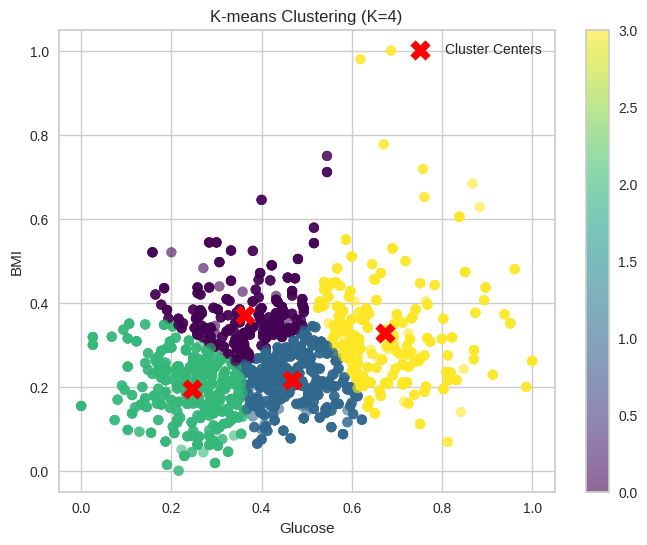

In [ ]:
# Select the two features used for clustering: Glucose and BMI
X = data[['Glucose', 'BMI']].values

# Fix the random seed for reproducibility
np.random.seed(42)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run K-means clustering for k = 2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nK-MEANS CLUSTERING - K = {k}")

    # Create and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(X)

    # Print the cluster centers and labels
    print("Cluster Centers:")
    print(kmeans_result.cluster_centers_)
    print("\nCluster Labels:")
    print(kmeans_result.labels_)

    # Plot the clusters and their centers
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1],
                          c=kmeans_result.labels_,
                          cmap='viridis', s=50, alpha=0.6)

    # Plot cluster centers
    plt.scatter(kmeans_result.cluster_centers_[:, 0],
                kmeans_result.cluster_centers_[:, 1],
                marker='X', s=200, c='red', label='Cluster Centers')

    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Glucose')
    plt.ylabel('BMI')
    plt.colorbar(scatter)
    plt.legend()
    plt.show()


# **Silhouette Score**
Silhouette scores were computed for K = 2, 3, and 4 to evaluate how well the clusters are separated.


Silhouette Visualization - K = 2
The average silhouette score is: 0.4204


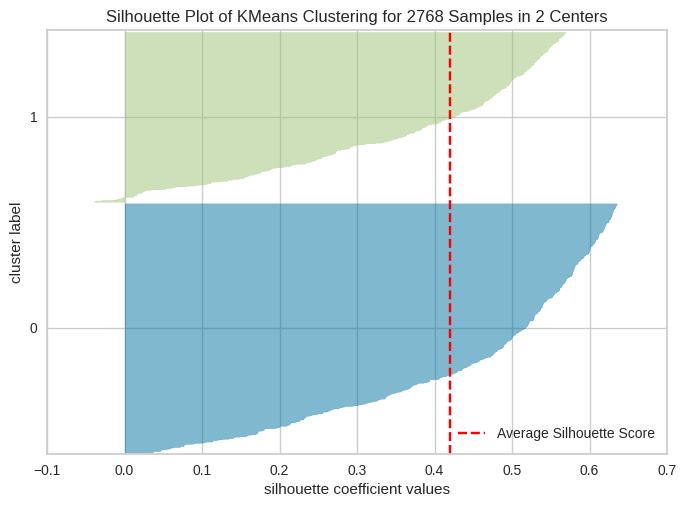


Silhouette Visualization - K = 3
The average silhouette score is: 0.3388


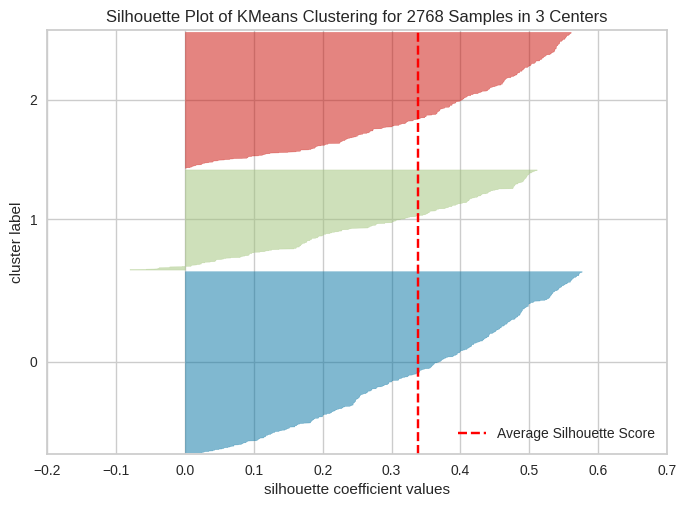


Silhouette Visualization - K = 4
The average silhouette score is: 0.3383


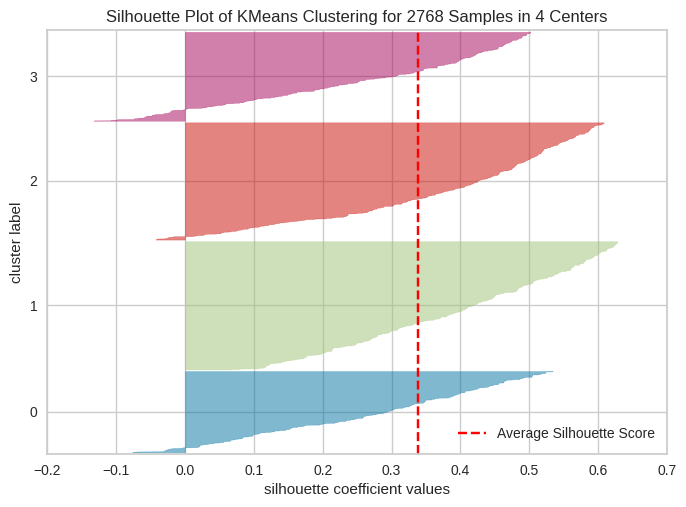

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

# Generate silhouette visualizations for k = 2, 3, and 4
for k in [2, 3, 4]:
    print(f"\nSilhouette Visualization - K = {k}")

    # Initialize SilhouetteVisualizer with K-means model
    kmeans = KMeans(n_clusters=k, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick")

    # Fit the model and compute silhouette score
    visualizer.fit(X)
    print(f"The average silhouette score is: {visualizer.silhouette_score_:.4f}")

    # Display the plot
    visualizer.show()


# **Elbow Method (WCSS)**
WCSS values were calculated for K = 1 to 10 to identify where the improvement in compactness starts to level off.

ELBOW METHOD (WCSS)
K = 2    WCSS = 59.0472
K = 3    WCSS = 43.9764
K = 4    WCSS = 35.5900


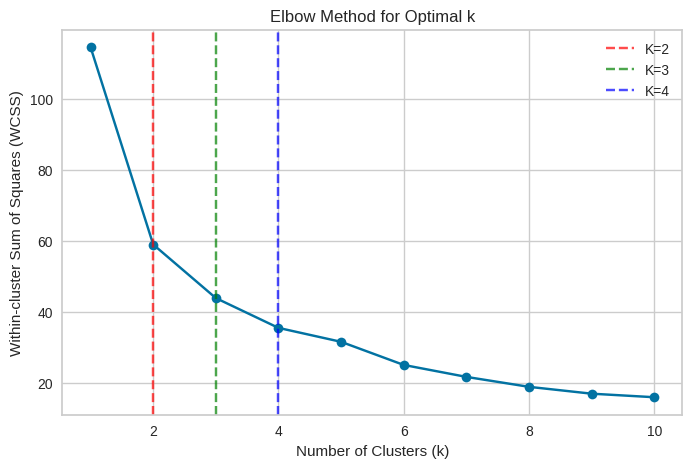

In [ ]:
print("ELBOW METHOD (WCSS)")

wcss_values = []
k_values = range(1, 11)

# Compute WCSS (Within-Cluster Sum of Squares) for k = 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_values.append(kmeans.inertia_)

    # Print only k=2,3,4 for comparison
    if k in [2, 3, 4]:
        print(f"K = {k}    WCSS = {kmeans.inertia_:.4f}")

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')

# Highlight candidate k values
plt.axvline(x=2, linestyle='--', color='red', alpha=0.7, label='K=2')
plt.axvline(x=3, linestyle='--', color='green', alpha=0.7, label='K=3')
plt.axvline(x=4, linestyle='--', color='blue', alpha=0.7, label='K=4')

plt.legend()
plt.show()



# **Missing Values**
Zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI were replaced with NaN, then filled using mean or median to clean the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(data)

# Convert to DataFrame so we can use isnull()
dataset_scaled = pd.DataFrame(dataset_scaled, columns=data.columns)

print("Missing values per column in dataset_scaled:\n", dataset_scaled.isnull().sum())


Missing values per column in dataset_scaled:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_Bin                     4
Glucose_Bin                 0
dtype: int64


# **Scaling the Dataset**
The StandardScaler was used to standardize the values, ensuring all features have similar ranges.

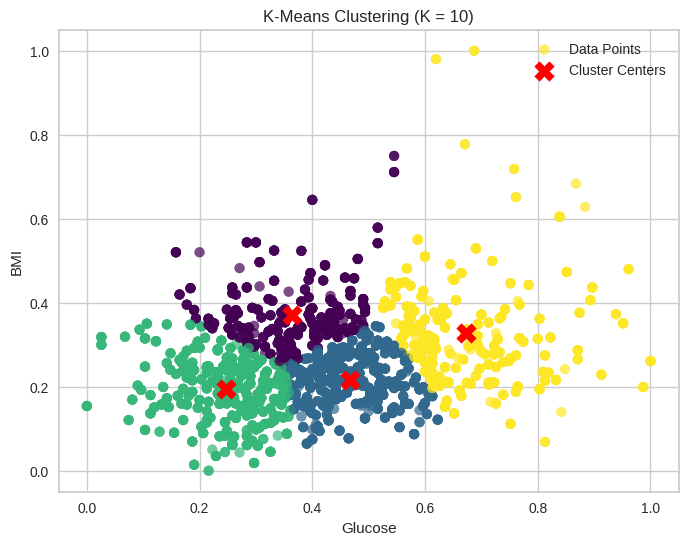

In [ ]:

   # Visualizing the clusters for each K value
plt.figure(figsize=(8, 6))

# Plot the data points and color them based on their cluster label
scatter = plt.scatter(
    X[:, 0], X[:, 1],
    c=kmeans_result.labels_,
    cmap='viridis',
    s=50,
    alpha=0.7,
    label='Data Points'
)

# Plot the cluster centers (centroids)
plt.scatter(
    kmeans_result.cluster_centers_[:, 0],
    kmeans_result.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

# Title and axis labels
plt.title(f'K-Means Clustering (K = {k})')
plt.xlabel('Glucose')
plt.ylabel('BMI')

# Display the legend
plt.legend()

# Show the final plot
plt.show()


K-Means Clustering Results

In this step, the K-Means clustering algorithm was applied to the preprocessed dataset using three different K values (2, 3, and 4).
The two numerical features Glucose and BMI were selected because they are important health indicators that vary significantly among individuals.
* When K = 2, the data formed two clear and well-separated clusters. This configuration achieved the highest silhouette score, indicating the best separation and cohesion.
* When K = 3, the clusters became less distinct, and some overlap was observed. The silhouette score dropped compared to K = 2.
* When K = 4, the clusters overlapped even more, and the structure became less meaningful.

**Based on the evaluation metrics and visualization,** **K = 2 is considered the most suitable number of clusters for this dataset.**